In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import warnings
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
warnings.filterwarnings('ignore')
from pmdarima.arima import auto_arima

**Uploading the data**

**Task1**

In [2]:
train = pd.read_csv('DS3_C1_S4_DailyDelhiClimateTrain_Data_Practice.csv')

In [7]:
train.shape

(1462, 5)

In [3]:
test = pd.read_csv('DS3_C1_S4_DailyDelhiClimateTest_Data_Practice.csv')

In [8]:
test.shape

(114, 5)

In [5]:
# concatenate into one data

In [6]:
temp_df = pd.concat([train,test])

In [9]:
temp_df.shape

(1576, 5)

In [10]:
# resampling 

In [11]:
temp_df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [12]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1576 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1576 non-null   object 
 1   meantemp      1576 non-null   float64
 2   humidity      1576 non-null   float64
 3   wind_speed    1576 non-null   float64
 4   meanpressure  1576 non-null   float64
dtypes: float64(4), object(1)
memory usage: 73.9+ KB


In [13]:
temp1 = temp_df.copy()

In [14]:
temp_df['date'] = pd.to_datetime(temp_df["date"])
temp_df=temp_df.set_index("date")

In [15]:
# index set as date

In [16]:
temp_df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [18]:
temp_df.sort_index(inplace=True)

In [19]:
# index sorted

In [20]:
temp_df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
# resampling 

In [21]:
maindf = temp_df['meantemp'].resample('7D').mean()

In [22]:
maindf

date
2013-01-01     7.604762
2013-01-08    13.176871
2013-01-15    13.409524
2013-01-22    12.848639
2013-01-29    16.107653
                ...    
2017-03-21    27.752381
2017-03-28    30.346372
2017-04-04    28.427638
2017-04-11    30.492063
2017-04-18    33.432143
Freq: 7D, Name: meantemp, Length: 225, dtype: float64

In [23]:
maindf.shape

(225,)

In [24]:
maindf.isnull().sum()

0

In [25]:
# no null

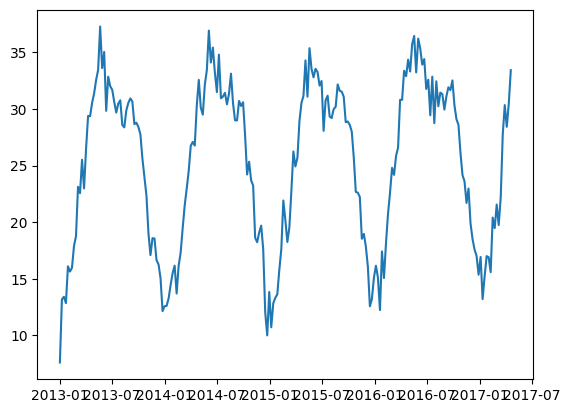

In [26]:
plt.plot(maindf)

In [27]:
result = adfuller(maindf)
p_value = result[1]

In [28]:
p_value

2.809835658479437e-06

In [29]:
#pvalue<0.05 

In [30]:
# stationary 

In [58]:
decompose = seasonal_decompose(maindf, period=52)

In [59]:
trend1 = decompose.trend
seasonal1 = decompose.seasonal
residual1 = decompose.resid

Text(0.5, 1.0, 'Trend')

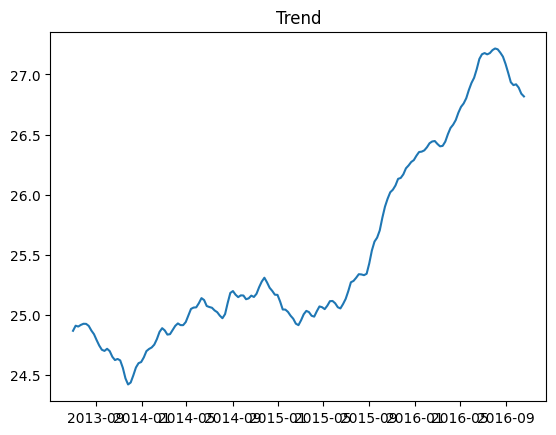

In [60]:
plt.plot(trend1)
plt.title('Trend')

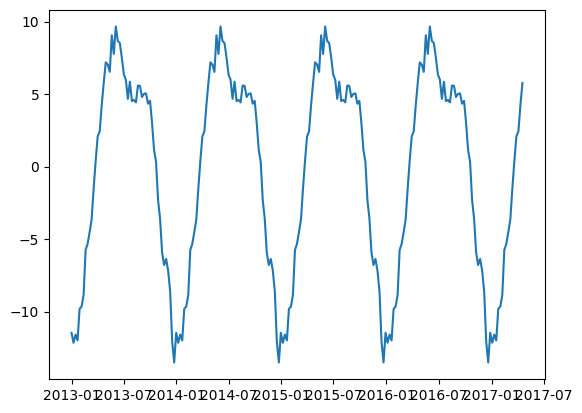

In [61]:
plt.plot(seasonal1)

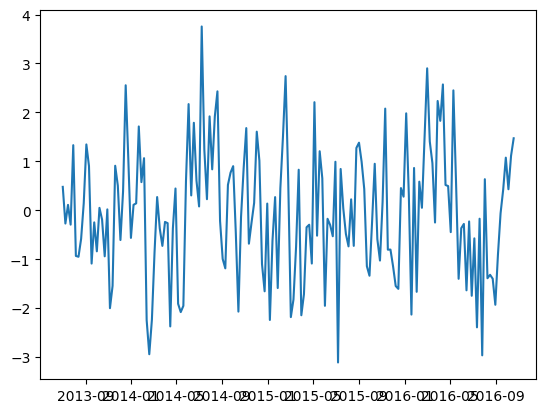

In [62]:
plt.plot(residual1)

In [31]:
# splitting

In [32]:
split_data = int(0.7*len(maindf))
train_data = maindf.iloc[:split_data]
test_data =  maindf.iloc[split_data:]

In [33]:
train_data.shape

(157,)

In [34]:
test_data.shape

(68,)

In [35]:
train_data

date
2013-01-01     7.604762
2013-01-08    13.176871
2013-01-15    13.409524
2013-01-22    12.848639
2013-01-29    16.107653
                ...    
2015-12-01    17.839286
2015-12-08    16.061224
2015-12-15    12.571429
2015-12-22    13.214286
2015-12-29    15.102041
Freq: 7D, Name: meantemp, Length: 157, dtype: float64

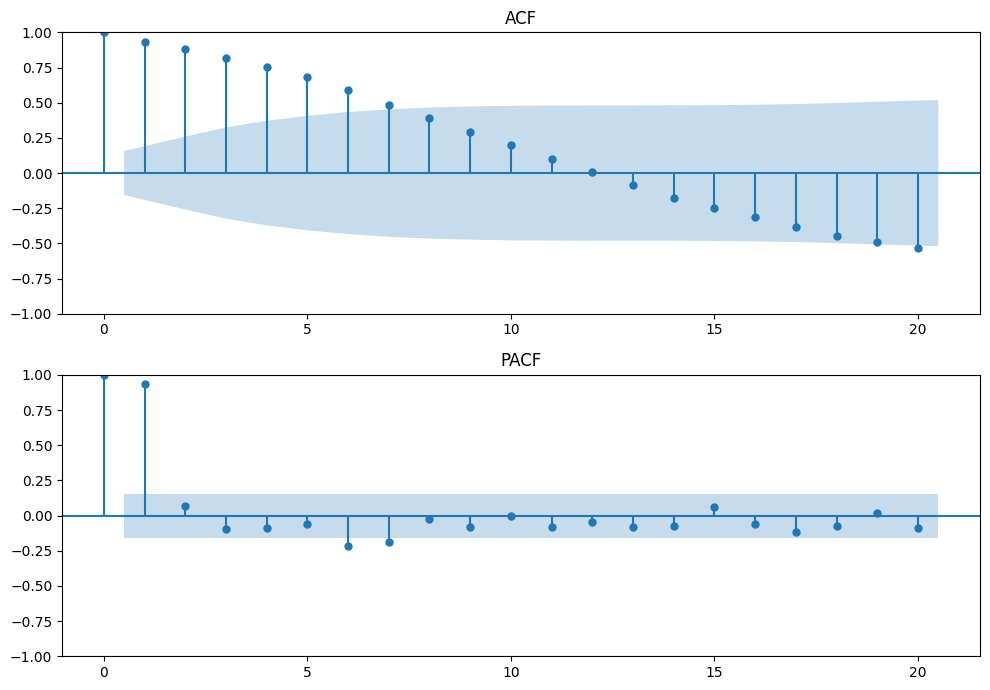

In [36]:
fig,ax = plt.subplots(nrows = 2, ncols=1, figsize = (10,7))

#acf plot
plot_acf(train_data,lags = 20, ax=ax[0])
ax[0].set_title('ACF')

#pacf plot
plot_pacf(train_data, lags=20,ax=ax[1])
ax[1].set_title('PACF')

plt.tight_layout()

**Task2**

In [38]:
# Arima

In [65]:
amodel=auto_arima(train_data,start_p=1,start_q=1,max_p=6,max_q=4,start_d=0,max_d=2,seasonal=False,trace=True)
amodel.summary()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=689.547, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1470.261, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1274.752, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=691.045, Time=0.50 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=689.595, Time=0.31 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1124.751, Time=0.35 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=678.246, Time=0.48 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=1.54 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=675.558, Time=0.80 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=690.944, Time=0.51 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=675.767, Time=1.16 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=675.163, Time=0.79 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=687.743, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  157
Model:               SARIMAX(2, 0, 4)   Log Likelihood                -320.392
Date:                Tue, 27 Jun 2023   AIC                            656.784
Time:                        16:45:43   BIC                            681.234
Sample:                    01-01-2013   HQIC                           666.714
                         - 12-29-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3757      0.051      7.379      0.000       0.276       0.475
ar.L1          1.9778      0.006    323.979      0.000       1.966       1.990
ar.L2         -0.9928      0.006   -171.489      0.000      -1.004      -0.981
ma.L1         -1.2894      0.096    -13.363      0.000      -1.479      -1.100
ma.L2          0.2508      0.142      1.762      0.078      -0.028       0.530
ma.L3          0.0289      0.149      0.194      0.846      -0.263       0.320
ma.L4          0.0319      0.099      0.322      0.748      -0.162       0.226
sigma2         3.4357      0.462      7.433      0.000       2.530       4.342
===================================================================================
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):                 3.95
Prob(Q):                              0.46   Prob(JB):                         0.14
Heteroskedasticity (H):               0.91   Skew:                            -0.39
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
# best model ARIMA (2,0,4) , (p,d,q)

In [41]:
#model fitting and predicting
ar_ml=sm.tsa.ARIMA(train_data,order=(2,0,4)).fit()
pred=ar_ml.predict(0,len(test_data)-1)

In [42]:
lb_p_val = acorr_ljungbox(ar_ml.resid, lags = [20], return_df = True)
lb_p_val

,lb_stat,lb_pvalue
20,15.734851,0.732931


In [43]:
#pval>0.05 , good model

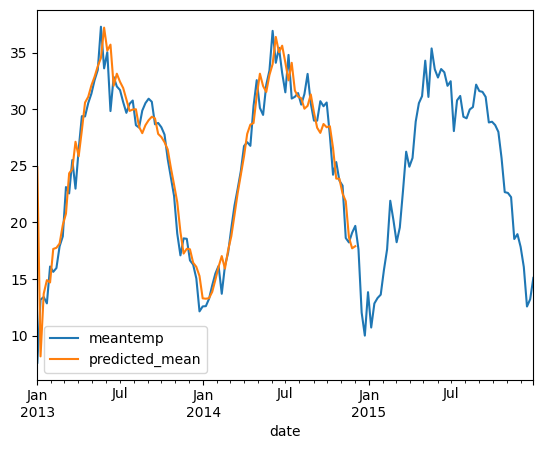

In [90]:
train_data.plot()
ar_ml.predict(start = 0, end = 100).plot()
plt.legend()

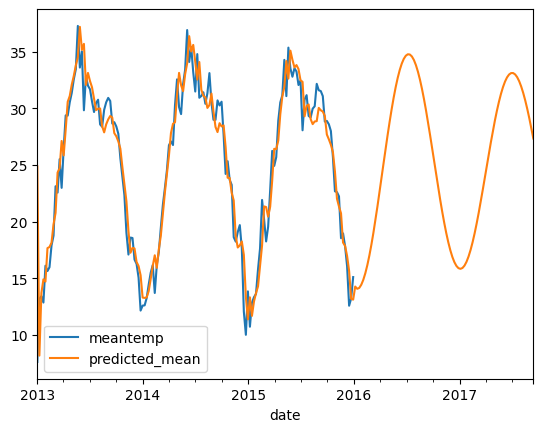

In [89]:
train_data.plot()
ar_ml.predict(start = 0, end =len(maindf)+20).plot()
plt.legend()

**Task3**

In [78]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [83]:
model=auto_arima(train_data,start_p=1,start_q=1,max_p=10,max_q=10,d=1,max_d=7,seasonal=True,trace=True,m=52)
model.summary()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=678.772, Time=6.22 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=679.653, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=674.847, Time=2.35 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=675.536, Time=2.00 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=677.734, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=681.340, Time=0.12 sec
 ARIMA(1,1,0)(2,0,0)[52] intercept   : AIC=676.771, Time=21.05 sec
 ARIMA(1,1,0)(1,0,1)[52] intercept   : AIC=676.772, Time=3.11 sec
 ARIMA(1,1,0)(0,0,1)[52] intercept   : AIC=675.424, Time=1.89 sec
 ARIMA(1,1,0)(2,0,1)[52] intercept   : AIC=678.770, Time=24.32 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=674.446, Time=1.50 sec
 ARIMA(0,1,0)(2,0,0)[52] intercept   : AIC=676.445, Time=15.65 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=676.445, Time=2.32 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=674.694, Time=2.15 sec
 ARIMA(0,1,0)(2,0,1)[52] inter

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  157
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 52)   Log Likelihood                -334.255
Date:                            Tue, 27 Jun 2023   AIC                            672.511
Time:                                    17:09:22   BIC                            678.611
Sample:                                01-01-2013   HQIC                           674.988
                                     - 12-29-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L52       0.2560      0.094      2.732      0.006       0.072       0.440
sigma2         4.1572      0.492      8.446      0.000       3.192       5.122
===================================================================================
Ljung-Box (L1) (Q):                   1.49   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.22   Prob(JB):                         0.87
Heteroskedasticity (H):               1.04   Skew:                            -0.08
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
model_s=SARIMAX(train_data,order=(0,1,0),seasonal_order=(1,0,0,52))
models=model_s.fit()

In [85]:
pred=models.predict(start=train_data.index[0],end=test_data.index[-1])


In [86]:
pred


2013-01-01     0.000000
2013-01-08     7.604762
2013-01-15    13.176871
2013-01-22    13.409524
2013-01-29    12.848639
                ...    
2017-03-21    16.238868
2017-03-28    16.151913
2017-04-04    16.202581
2017-04-11    16.413279
2017-04-18    16.519798
Freq: 7D, Name: predicted_mean, Length: 225, dtype: float64

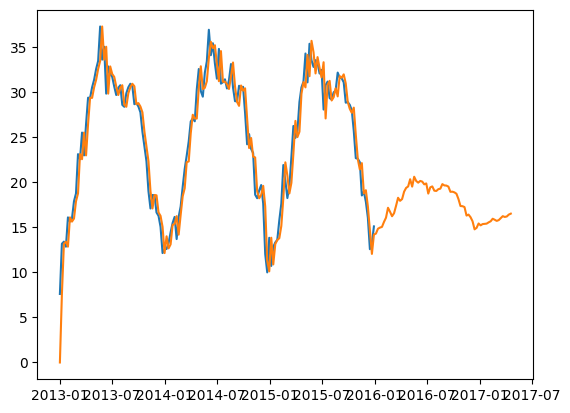

In [88]:
plt.plot(train_data.index,train_data)
plt.plot(pred.index,pred)

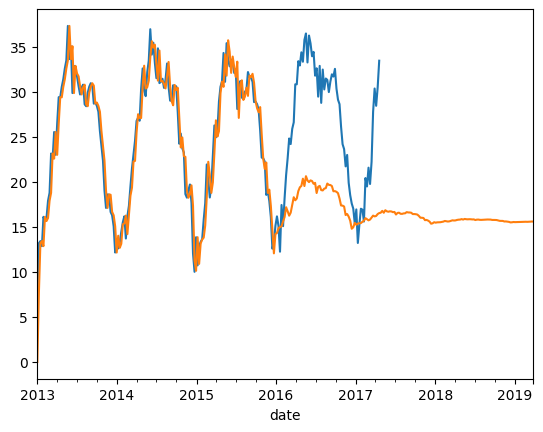

In [91]:
maindf.plot()
models.predict(start=0,end=len(maindf)+100).plot()
plt.show()

In [92]:
d=1
model_s=SARIMAX(maindf,order=(0,1,0),seasonal_order=(1,0,0,52))
models=model_s.fit()

In [93]:
pred=models.predict(start=train_data.index[0],end=test_data.index[-1])

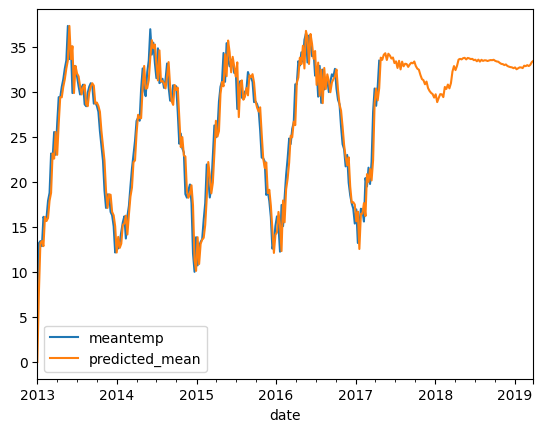

In [94]:
maindf.plot()
models.predict(start=0,end=len(maindf)+100).plot()
plt.legend()